Author: Dominique Grimes

Assignment: Final - Milestone 5

Date: November 18, 2023

# Inital Setup

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn import utils
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from fast_ml.model_development import train_valid_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
# Read file into dataframe
df = pd.read_csv('Churn_Modelling_2.csv')

In [3]:
# View dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# View the shape of the dataframe
df.shape

(10000, 14)

# Data Preparation

## Drop columns

In [5]:
# Drop unnecessary columns
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

## Identify Null Values

In [6]:
df.isnull().value_counts()

CreditScore  Geography  Gender  Age    Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
False        False      False   False  False   False    False          False      False           False            False     10000
dtype: int64

No null values.

## Convert Gender to Binomial Values

In [7]:
# Convert Male to 1 and Female to 0 using map function
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [8]:
# Verify mapping
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

## View and manage data types

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# Typecast to Categorical column in pandas
df[['Tenure','NumOfProducts']] = df[['Tenure','NumOfProducts']].astype('category')
df.dtypes

CreditScore           int64
Geography            object
Gender                int64
Age                   int64
Tenure             category
Balance             float64
NumOfProducts      category
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

# Exploratory Data Analysis

## View value counts of categorical data.

In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [13]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [14]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

## Convert categorical to dummy variables

In [15]:
df=pd.get_dummies(df)
pd.set_option('display.max_columns', None)

# View data frame
df.head()

,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,0.00,1,1,101348.88,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,608,0,41,83807.86,0,1,112542.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,502,0,42,159660.80,1,0,113931.57,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,699,0,39,0.00,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,850,0,43,125510.82,1,1,79084.10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


## Value counts of binomial variables

Verify and understand split of binomial variables.

In [16]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [17]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [18]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Continuous variable Analysis

In [19]:
# Create a dataframe of the continuous variables
summ_stat = df[['CreditScore','Age','Balance','EstimatedSalary']]

## Summary Stats

In [20]:
# View summary statistics
summ_stat.describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


In [21]:
# Observe the median
summ_stat.median()

CreditScore           652.000
Age                    37.000
Balance             97198.540
EstimatedSalary    100193.915
dtype: float64

In [22]:
# Observe the mode
summ_stat.mode()

,CreditScore,Age,Balance,EstimatedSalary
0,850,37,0.0,24924.92


In [23]:
cont_df = df[['CreditScore','Age','Balance','EstimatedSalary']]
cont_df.shape

(10000, 4)

## Pearson correlation of continuous variables

In [24]:
corr = cont_df.corr(method = 'pearson')
corr

,CreditScore,Age,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.006268,-0.001384
Age,-0.003965,1.000000,0.028308,-0.007201
Balance,0.006268,0.028308,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.012797,1.000000


## Point-biserial correlations of binomial features

### Gender

In [25]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Gender'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.002857,-0.027544,0.012087,-0.008112
1,0.775164,0.005877,0.226836,0.417282


### Has Credit Card

In [26]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['HasCrCard'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.005458,-0.011721,-0.014858,-0.009933
1,0.585214,0.241198,0.137350,0.320592


### Is Active Member

In [27]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['IsActiveMember'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.025651,8.547215e-02,-0.010084,-0.011421
1,0.010311,1.111027e-17,0.313306,0.253438


### Exited

In [28]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Exited'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.027094,2.853230e-01,1.185328e-01,0.012097
1,0.006738,1.239931e-186,1.275563e-32,0.226440


### Geography_France

In [29]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Geography_France'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.008928,-0.039208,-2.313290e-01,-0.003332
1,0.372011,0.000088,1.360935e-121,0.739041


### Geography_Germany

In [30]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Geography_Germany'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.005538,0.046897,0.40111,0.010297
1,0.579791,0.000003,0.00000,0.303195


### Geography_Spain

In [31]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Geography_Spain'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.004780,-0.001685,-1.348919e-01,-0.006482
1,0.632707,0.866177,7.980247e-42,0.516880


### Tenure_0

In [32]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_0'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.003253,0.005238,0.011287,0.008245
1,0.744981,0.600493,0.259072,0.409730


### Tenure_1

In [33]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_1'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.006054,0.016432,0.011270,0.002236
1,0.544960,0.100354,0.259797,0.823120


### Tenure_2

In [34]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_2'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.008154,0.004450,0.001940,-0.010578
1,0.414896,0.656335,0.846211,0.290200


### Tenure_3

In [35]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_3'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.000005,0.003416,0.006347,-0.014115
1,0.999605,0.732680,0.525664,0.158132


### Tenure_4

In [36]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_4'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.003338,-0.021550,-0.012884,-0.001282
1,0.738580,0.031167,0.197649,0.898037


### Tenure_5

In [37]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_5'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.000004,0.011703,-0.000224,0.006977
1,0.999686,0.241942,0.982150,0.485402


### Tenure_6

In [38]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_6'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.010658,-0.001851,-0.010917,-0.005243
1,0.286567,0.853146,0.274990,0.600121


### Tenure_7

In [39]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_7'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.003232,-0.017884,-0.005068,0.006869
1,0.746586,0.073718,0.612308,0.492191


### Tenure_8

In [40]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_8'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.009719,-0.015180,0.007857,0.00577
1,0.331150,0.129046,0.432069,0.56399


### Tenure_9

In [41]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_9'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.010629,0.013348,0.000406,-0.003869
1,0.287895,0.181978,0.967629,0.698848


### Tenure_10

In [42]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['Tenure_10'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.007486,0.004961,-0.009307,0.010719
1,0.454131,0.619842,0.352037,0.283806


### NumOfProducts_1

In [43]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['NumOfProducts_1'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.014813,7.285220e-02,3.596460e-01,-0.010663
1,0.138545,3.008794e-13,4.323076e-303,0.286338


### NumOfProducts_2

In [44]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['NumOfProducts_2'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.015819,-1.026039e-01,-3.632595e-01,0.005795
1,0.113688,8.126829e-25,1.281968e-309,0.562329


### NumOfProducts_3

In [45]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['NumOfProducts_3'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,-0.004145,6.736512e-02,-0.002722,0.012153
1,0.678527,1.547966e-11,0.785460,0.224282


### NumOfProducts_4

In [46]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']].corrwith(df['NumOfProducts_4'].astype('float'), method=stats.pointbiserialr)

,CreditScore,Age,Balance,EstimatedSalary
0,0.002455,5.009157e-02,0.021476,0.006314
1,0.806057,5.395763e-07,0.031746,0.527833


## Histograms of continuous variables

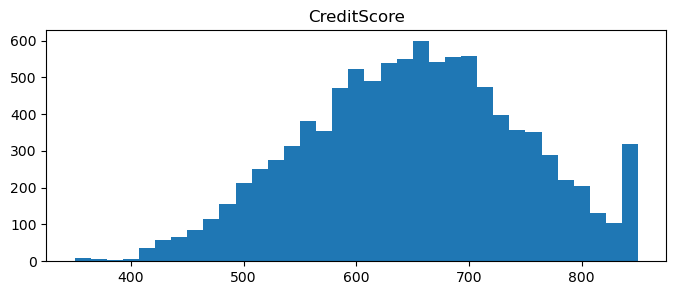

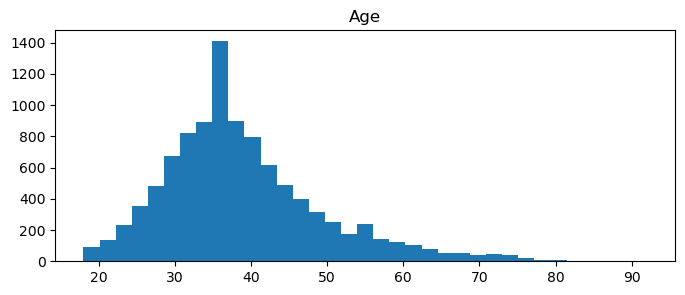

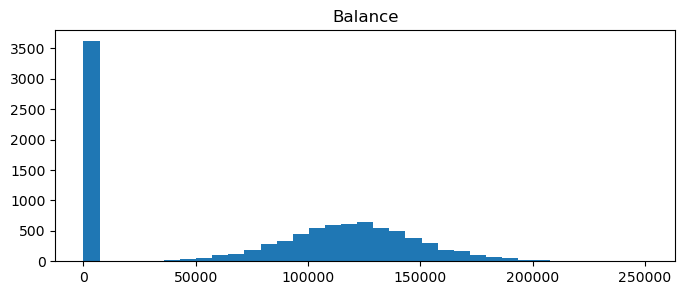

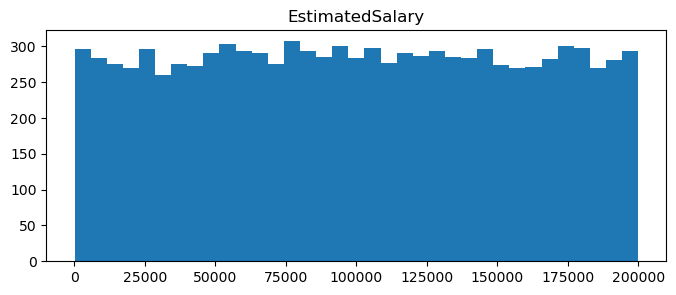

In [47]:
# Observe distributions on continuous features with histograms
for i in summ_stat.columns:
    plt.figure(figsize=(8,3))
    plt.title(f'{i}')
    plt.hist(summ_stat[i], bins=35)

- CreditScore is bimodal with negative skew. Mean (650) and Median (652) are relatively consistent; however, the mode is the maximum credit score value of 850, which could be the cause in the skewed data. These values may need to be looked at separately than the rest of the credit score.
- Age is unimodal with a positive skew and is leptokurtic with a very sharp peak. Median and mode are both 37 with mean slightly to the right at approximately 39.
- Balance looks to have a realtively normal distribution if 0 is excluded from the balance value. The mean value of approximately 76,500 is impacted by the mode value of 0. The median balance is approximately 97,000.
- EstimatedSalary is relatively uniform in distribution. The mean and median are approximately 100,000 with a min close to 0 and max of nearly 200,000. However, the mode is approximately 25,000.

## Box plots of continuous variables

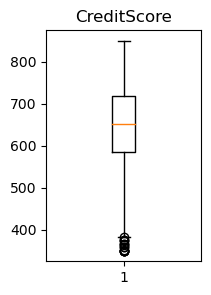

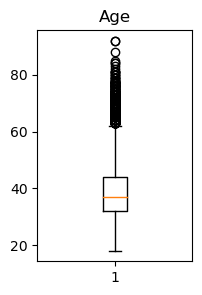

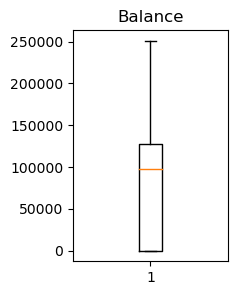

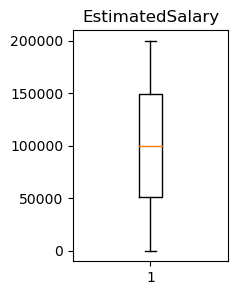

In [48]:
# Plot box plots of continuous variables
for i in summ_stat.columns:
    plt.figure(figsize=(2,3))
    plt.title(f'{i}')
    plt.boxplot(summ_stat[i])

# Transformations

## Adjust for skewness of Age feature by applying log transformation.

In [49]:
# Create new datafrome for columns to apply log transformations
log_data = np.log(summ_stat[['CreditScore','Age']]) 

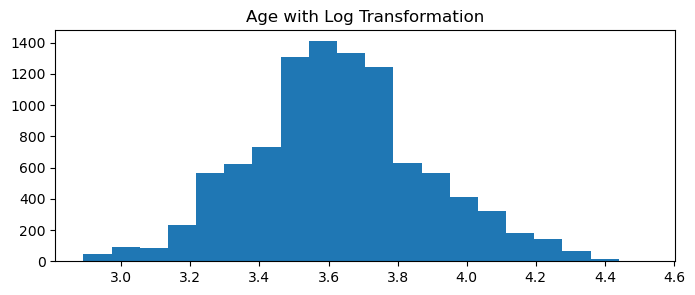

In [50]:
# Plot histogram of Age with log transformation
plt.figure(figsize=(8,3))
plt.title('Age with Log Transformation')
plt.hist(log_data['Age'], bins=20)
plt.show()

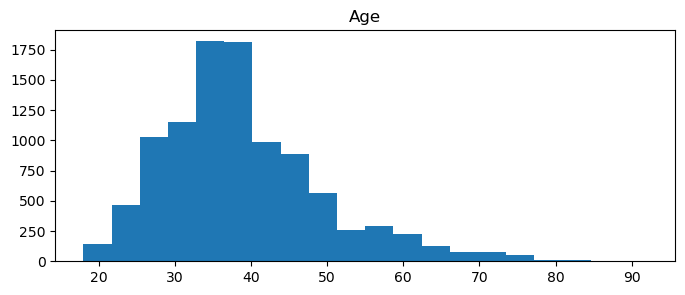

In [51]:
# Plot histogram of Age without log transformation for comparision
plt.figure(figsize=(8,3))
plt.title('Age')
plt.hist(summ_stat['Age'], bins=20)
plt.show()

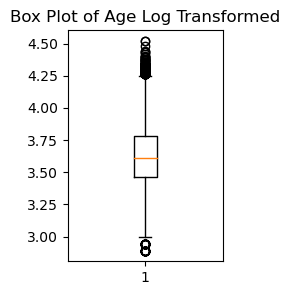

In [52]:
# Plot boxplot of Age with log transformation
plt.figure(figsize=(2,3))
plt.title('Box Plot of Age Log Transformed')
plt.boxplot(log_data['Age'])
plt.show()

Although there are still some outliers and slight positive skewness, the log transformation did reduce the skew. I will replace Age with Age_log.

## Add Age_log to data frame and drop Age

In [53]:
extracted_col = log_data["Age"] 
df1 = df.copy(deep=True)
df1.insert(2, "Age_log", extracted_col) 
df1.drop('Age', axis=1, inplace= True)

In [54]:
# View df1 to verify column adjustment
df1.head()

,CreditScore,Gender,Age_log,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,3.737670,0.00,1,1,101348.88,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,608,0,3.713572,83807.86,0,1,112542.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,502,0,3.737670,159660.80,1,0,113931.57,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,699,0,3.663562,0.00,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,850,0,3.761200,125510.82,1,1,79084.10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


# Balance Feature Options

## Create dataframes for options

### Option 2 for balance variable: Drop all 0 of log transformed Balance

In [55]:
# Copy df1 as df2
df2 = df1.copy(deep=True)

In [56]:
# Replance all 0 Balances wit NaN
df2['Balance'].replace(0, np.nan, inplace=True)

In [57]:
# Drop the NaN values
df2=df2.dropna()

In [58]:
# View df2 to verify zero balance rows are dropped
df2.head()

,CreditScore,Gender,Age_log,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
1,608,0,3.713572,83807.86,0,1,112542.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,502,0,3.737670,159660.80,1,0,113931.57,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,850,0,3.761200,125510.82,1,1,79084.10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,645,1,3.784190,113755.78,1,0,149756.71,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
7,376,0,3.367296,115046.74,1,0,119346.88,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


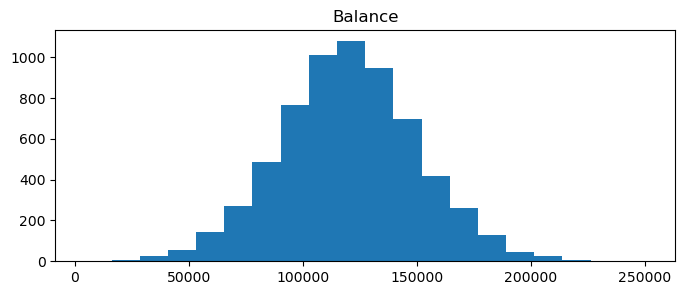

In [59]:
# Plot histogram of Balance without zero balance.
plt.figure(figsize=(8,3))
plt.title('Balance')
plt.hist(df2['Balance'], bins=20)
plt.show()

In [60]:
# View size of df2 after dropping zero balance rows.
df2.shape

(6383, 26)

### Option 3 for balance variable: Convert 0 to 1 & log transform

In [61]:
# Create new dataframe
df3 = df1.copy(deep=True)

In [62]:
# View df3
df3.head()

,CreditScore,Gender,Age_log,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,3.737670,0.00,1,1,101348.88,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,608,0,3.713572,83807.86,0,1,112542.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,502,0,3.737670,159660.80,1,0,113931.57,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,699,0,3.663562,0.00,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,850,0,3.761200,125510.82,1,1,79084.10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
# Replace all 0 balances with NaN
df3['Balance'].replace(0, np.nan, inplace=True)

In [64]:
# Replace all NaN with 1
df3['Balance']=df3['Balance'].fillna(1)

In [65]:
# Take the log transformation of the new Balance column
log_Bal = np.log(df3['Balance']) 

In [66]:
# Insert the log transformed Balance column into the new dataframe
df3.insert(4, "Balance_log", log_Bal)

# Drop the Balance feature
df3=df3.drop('Balance', axis=1)

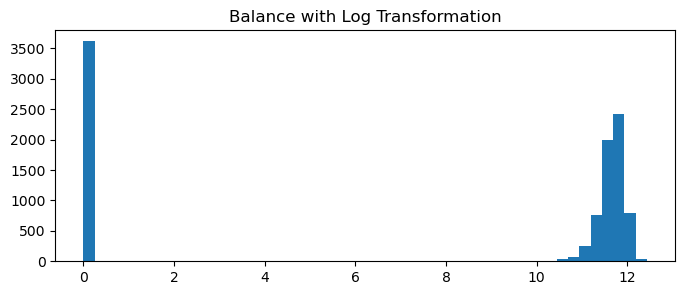

In [67]:
# View the distribution of the log transformed variable
plt.figure(figsize=(8,3))
plt.title('Balance with Log Transformation')
plt.hist(df3['Balance_log'], bins=50)
plt.show()

In [68]:
# View the data frame
df3.head()

,CreditScore,Gender,Age_log,Balance_log,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,3.737670,0.000000,1,1,101348.88,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,608,0,3.713572,11.336282,0,1,112542.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,502,0,3.737670,11.980807,1,0,113931.57,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,699,0,3.663562,0.000000,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,850,0,3.761200,11.740147,1,1,79084.10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


### Option 4 for balance variable: Replace Balance & Salary with ratio of Blance to Salary. 

In [69]:
# Copy df1 to df4
df4=df1.copy(deep=True)

In [70]:
# View df4 
df4.head()

,CreditScore,Gender,Age_log,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,3.737670,0.00,1,1,101348.88,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,608,0,3.713572,83807.86,0,1,112542.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,502,0,3.737670,159660.80,1,0,113931.57,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,699,0,3.663562,0.00,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,850,0,3.761200,125510.82,1,1,79084.10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [71]:
# Add Bal_Sal feature
df4['Bal_Sal'] = df4['Balance']/df4['EstimatedSalary']

In [72]:
# Drop Balance and Estimated Salary features
df4.drop(columns = {'Balance','EstimatedSalary'}, inplace = True)

In [73]:
# Fill Na Balance/Salary with 0.
df4['Bal_Sal'] = df4['Bal_Sal'].fillna(0)

In [74]:
# View updates to df4
df4.head()

,CreditScore,Gender,Age_log,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Bal_Sal
0,619,0,3.737670,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.000000
1,608,0,3.713572,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.744677
2,502,0,3.737670,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1.401375
3,699,0,3.663562,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000
4,850,0,3.761200,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1.587055


### Option 5 for balance variable: Convert to binomial for zero_bal

In [75]:
# Copy df1 into df5
df5 = df1.copy(deep=True)

In [76]:
# View df5
df5.head()

,CreditScore,Gender,Age_log,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,3.737670,0.00,1,1,101348.88,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,608,0,3.713572,83807.86,0,1,112542.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,502,0,3.737670,159660.80,1,0,113931.57,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,699,0,3.663562,0.00,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,850,0,3.761200,125510.82,1,1,79084.10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [77]:
# Convert Balance to integer
df5['Balance'] = df5['Balance'].astype('int')

In [78]:
# Replace all 0 balances with 1
df5['Balance'].replace(0, 1, inplace = True)

In [79]:
# Verify replacement
df5.head()

,CreditScore,Gender,Age_log,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,3.737670,1,1,1,101348.88,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,608,0,3.713572,83807,0,1,112542.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,502,0,3.737670,159660,1,0,113931.57,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,699,0,3.663562,1,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,850,0,3.761200,125510,1,1,79084.10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [80]:
# Replace all Balances greater than 1 with 1
df5.replace(df5['Balance'] > 1, 0, inplace=True)

In [81]:
# Verify replacement
df5.head()

,CreditScore,Gender,Age_log,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,3.737670,1,1,1,101348.88,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,608,0,3.713572,83807,0,1,112542.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,502,0,3.737670,159660,1,0,113931.57,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,699,0,3.663562,1,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,850,0,3.761200,125510,1,1,79084.10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [82]:
# Rename the Balance column to Zero_Bal
df5 = df5.rename(columns={'Balance':'Zero_Bal'})

In [83]:
# Verify column header change
df5.head()

,CreditScore,Gender,Age_log,Zero_Bal,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,3.737670,1,1,1,101348.88,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,608,0,3.713572,83807,0,1,112542.58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,502,0,3.737670,159660,1,0,113931.57,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,699,0,3.663562,1,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,850,0,3.761200,125510,1,1,79084.10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [84]:
# Check target feature value counts
df5['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Equal sampling of exit data.

### Option 1

In [85]:
# Observe the value counts of the Exited feature
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [86]:
# Pick all 1 class, fill the sample with 0 class and shuffle.
df1 = utils.shuffle(df1.groupby("Exited").head(4000 - 2037))

# Reset index by dropping old index.
df1.reset_index(drop=True, inplace=True)

In [87]:
# View revised dataframe value counts for Exited feature.
df1['Exited'].value_counts()

1    1963
0    1963
Name: Exited, dtype: int64

### Option 2

In [88]:
# View df2 value counts
df2['Exited'].value_counts()

0    4846
1    1537
Name: Exited, dtype: int64

In [89]:
# Pick all 1 class, fill the sample with 0 class and shuffle.
df2 = utils.shuffle(df2.groupby("Exited").head(3000 - 1537))

# Reset index by dropping old index.
df2.reset_index(drop=True, inplace=True)

In [90]:
# View revised dataframe value counts for Exited feature.
df2['Exited'].value_counts()

0    1463
1    1463
Name: Exited, dtype: int64

### Option 3

In [91]:
# Pick all 1 class, fill the sample with 0 class and shuffle.
df3 = utils.shuffle(df3.groupby("Exited").head(4000 - 2037))

# Reset index by dropping old index.
df3.reset_index(drop=True, inplace=True)

In [92]:
# View revised dataframe value counts for Exited feature.
df3['Exited'].value_counts()

0    1963
1    1963
Name: Exited, dtype: int64

### Option 4

In [93]:
# Pick all 1 class, fill the sample with 0 class and shuffle.
df4 = utils.shuffle(df4.groupby("Exited").head(4000 - 2037))

# Reset index by dropping old index.
df4.reset_index(drop=True, inplace=True)

In [94]:
# View revised dataframe value counts for Exited feature.
df4['Exited'].value_counts()

1    1963
0    1963
Name: Exited, dtype: int64

### Option 5

In [95]:
# Pick all 1 class, fill the sample with 0 class and shuffle.
df5 = utils.shuffle(df5.groupby("Exited").head(4000 - 2037))

# Reset index by dropping old index.
df5.reset_index(drop=True, inplace=True)

In [96]:
# View revised dataframe value counts for Exited feature.
df5['Exited'].value_counts()

1    1963
0    1963
Name: Exited, dtype: int64

## Random Forest Model for Balance Option Evaluation

### Split training, test, validation set for options 1-5

In [114]:
# Create target and features

df1_target = df1['Exited']
df1_feature = df1.drop('Exited', axis = 1)

df2_target = df2['Exited']
df2_feature = df2.drop('Exited', axis = 1)

df3_target = df3['Exited']
df3_feature = df3.drop('Exited', axis = 1)

df4_target = df4['Exited']
df4_feature = df4.drop('Exited', axis = 1)

df5_target = df5['Exited']
df5_feature = df5.drop('Exited', axis = 1)

#### Option 1

In [103]:
# Split the balanced data into train & test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(df1_feature, df1_target,
                                                        test_size=.30,
                                                        random_state=0,
                                                        stratify=df1_target)

In [108]:
# View value counts as percentange for target1.
y1_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Exited, dtype: float64

In [109]:
y1_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: Exited, dtype: float64

#### Option 2

In [110]:
# Split the balanced data into train & test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(df2_feature, df2_target,
                                                        test_size=.30,
                                                        random_state=0,
                                                        stratify=df2_target)

In [111]:
# View value counts as percentange for target2.
y2_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Exited, dtype: float64

In [112]:
y2_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: Exited, dtype: float64

#### Option 3

In [115]:
# Split the balanced data into train & test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(df3_feature, df3_target,
                                                        test_size=.30,
                                                        random_state=0,
                                                        stratify=df3_target)

In [116]:
# View value counts as percentange for target3.
y3_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Exited, dtype: float64

In [117]:
y3_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: Exited, dtype: float64

#### Option 4

In [120]:
# Split the balanced data into train & test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(df4_feature, df4_target, 
                                                        test_size=.30,
                                                        random_state=0,
                                                        stratify=df4_target)

In [121]:
# View value counts as percentange for target4.
y4_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Exited, dtype: float64

In [122]:
y4_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: Exited, dtype: float64

#### Option 5

In [123]:
# Split the balanced data into train & test sets
X5_train, X5_test, y5_train, y5_test = train_test_split(df5_feature, df5_target,
                                                        test_size=.30,
                                                        random_state=0,
                                                        stratify=df5_target)

In [124]:
# View value counts as percentange for target5.
y5_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Exited, dtype: float64

In [125]:
y5_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: Exited, dtype: float64

### Fit and Train the models

In [126]:
# Option 1
rf1= RandomForestClassifier()
model1 = rf1.fit(X1_train, y1_train)

In [127]:
# Option 2
rf2= RandomForestClassifier()
model2 = rf2.fit(X2_train, y2_train)

In [128]:
# Option 3
rf3= RandomForestClassifier()
model3 = rf3.fit(X3_train, y3_train)

In [129]:
# Option 4
rf4= RandomForestClassifier()
model4 = rf4.fit(X4_train, y4_train)

In [130]:
# Option 5
rf5= RandomForestClassifier()
model5 = rf5.fit(X5_train, y5_train)

### Evaluate the models

#### Confusion Matrix, Classification Report

In [131]:
# Option 1
y1_pred = rf1.predict(X1_test)
print('Confusion Matrix \n',confusion_matrix(y1_test, y1_pred),'\n')
print('Classification Report\n',classification_report(y1_test, y1_pred))

Confusion Matrix 
 [[454 135]
 [131 458]] 

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       589
           1       0.77      0.78      0.77       589

    accuracy                           0.77      1178
   macro avg       0.77      0.77      0.77      1178
weighted avg       0.77      0.77      0.77      1178



In [132]:
# Option 2
y2_pred = rf2.predict(X2_test)
print('Confusion Matrix \n', confusion_matrix(y2_test, y2_pred),'\n')
print('Classification Report\n', classification_report(y2_test, y2_pred))

Confusion Matrix 
 [[342  97]
 [126 313]] 

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       439
           1       0.76      0.71      0.74       439

    accuracy                           0.75       878
   macro avg       0.75      0.75      0.75       878
weighted avg       0.75      0.75      0.75       878



In [133]:
# Option 3
y3_pred = rf3.predict(X3_test)
print('Confusion Matrix \n',confusion_matrix(y3_test, y3_pred),'\n')
print('Classification Report\n',classification_report(y3_test, y3_pred))

Confusion Matrix 
 [[490  99]
 [160 429]] 

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       589
           1       0.81      0.73      0.77       589

    accuracy                           0.78      1178
   macro avg       0.78      0.78      0.78      1178
weighted avg       0.78      0.78      0.78      1178



In [134]:
# Option 4
y4_pred = rf4.predict(X4_test)
print('Confusion Matrix \n',confusion_matrix(y4_test, y4_pred),'\n')
print('Classification Report\n',classification_report(y4_test, y4_pred))

Confusion Matrix 
 [[469 120]
 [162 427]] 

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       589
           1       0.78      0.72      0.75       589

    accuracy                           0.76      1178
   macro avg       0.76      0.76      0.76      1178
weighted avg       0.76      0.76      0.76      1178



In [135]:
# Option 5
y5_pred = rf5.predict(X5_test)
print('Confusion Matrix \n', confusion_matrix(y5_test, y5_pred),'\n')
print('Classification Report\n',classification_report(y5_test, y5_pred))

Confusion Matrix 
 [[462 127]
 [154 435]] 

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.78      0.77       589
           1       0.77      0.74      0.76       589

    accuracy                           0.76      1178
   macro avg       0.76      0.76      0.76      1178
weighted avg       0.76      0.76      0.76      1178



#### ROC Curve and ROC AUC

In [136]:
# Compute the false positive rate (FPR)  
# and true positive rate (TPR) for different classification thresholds 

# Create a function to plot the ROC curves for each option
def plot_roc_curve(y_test, y_pred_prob, roc_auc):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve') 
    plt.legend(loc="lower right") 
    plt.show()

In [137]:
# Get predicted class probabilities for the test sets 
y1_pred_prob = rf1.predict_proba(X1_test)[:, 1]
y2_pred_prob = rf2.predict_proba(X2_test)[:, 1]
y3_pred_prob = rf3.predict_proba(X3_test)[:, 1]
y4_pred_prob = rf4.predict_proba(X4_test)[:, 1] 
y5_pred_prob = rf5.predict_proba(X5_test)[:, 1] 

In [138]:
# Compute the ROC AUC score 
roc_auc1 = roc_auc_score(y1_test, y1_pred_prob) 
roc_auc2 = roc_auc_score(y2_test, y2_pred_prob)
roc_auc3 = roc_auc_score(y3_test, y3_pred_prob) 
roc_auc4 = roc_auc_score(y4_test, y4_pred_prob) 
roc_auc5 = roc_auc_score(y5_test, y5_pred_prob) 

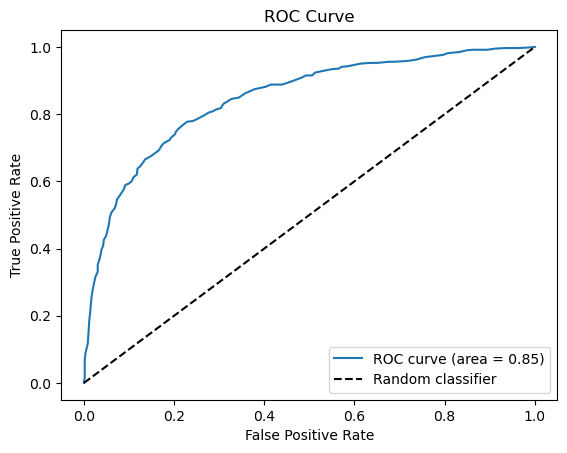

In [139]:
# Plot ROC Option 1
plot_roc_curve(y1_test, y1_pred_prob, roc_auc1)

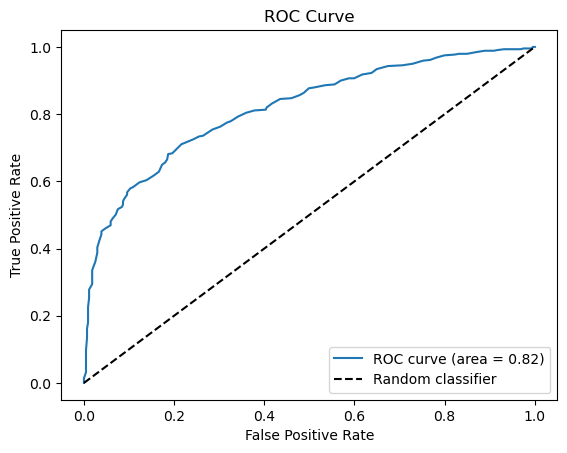

In [140]:
# Plot ROC Option 2
plot_roc_curve(y2_test, y2_pred_prob, roc_auc2)

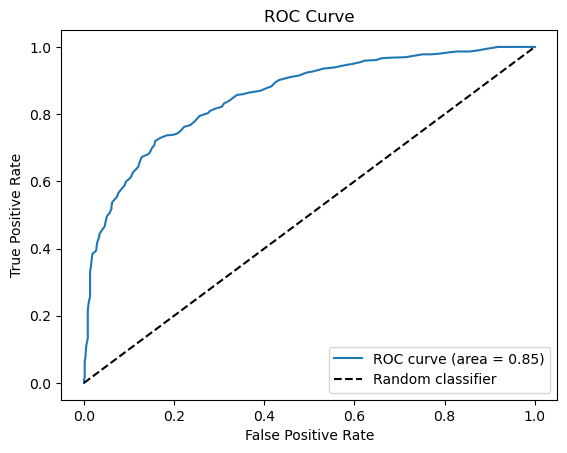

In [141]:
# Plot ROC Option 3
plot_roc_curve(y3_test, y3_pred_prob, roc_auc3)

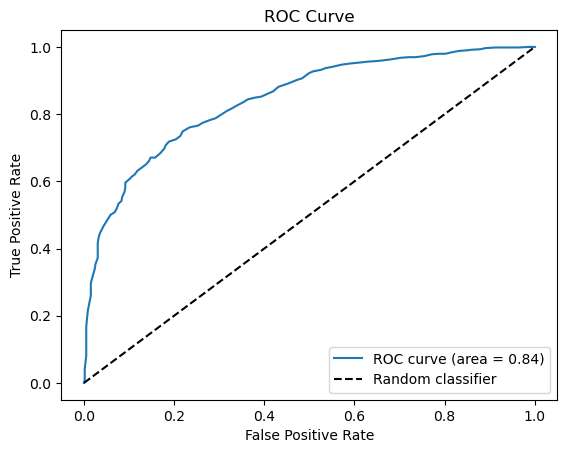

In [142]:
# Plot ROC Option 4
plot_roc_curve(y4_test, y4_pred_prob, roc_auc4)

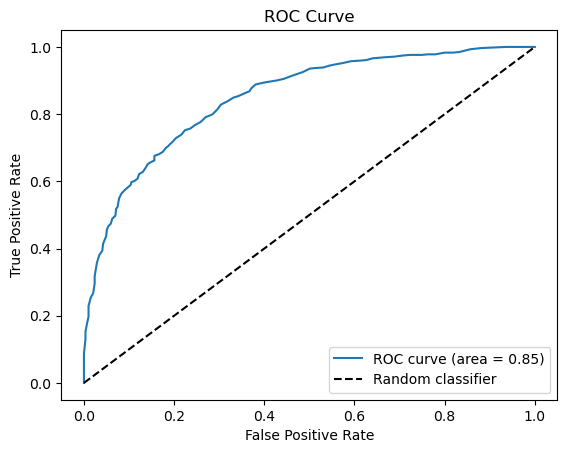

In [143]:
# Plot ROC Option 5
plot_roc_curve(y5_test, y5_pred_prob, roc_auc5)

## Feature Importance

In [144]:
# Option 1
fi1 = pd.DataFrame({'feature1': list(X1_train.columns),
                   'importance1': rf1.feature_importances_}).\
                    sort_values('importance1', ascending = False)
fi1.head()

,feature1,importance1
2,Age_log,0.221372
3,Balance,0.132248
6,EstimatedSalary,0.121200
0,CreditScore,0.117504
22,NumOfProducts_2,0.087115


In [148]:
# Option 5
fi5 = pd.DataFrame({'feature5': list(X5_train.columns),
                   'importance5': rf5.feature_importances_}).\
                    sort_values('importance5', ascending = False)
fi5.head()

,feature5,importance5
2,Age_log,0.233885
3,Zero_Bal,0.125782
6,EstimatedSalary,0.121146
0,CreditScore,0.115282
22,NumOfProducts_2,0.088138


Option 1 is the strongest for models that are not impacted by skew. I'd like to explore Option 5 as well.

## Plot the predicted class probabilities 

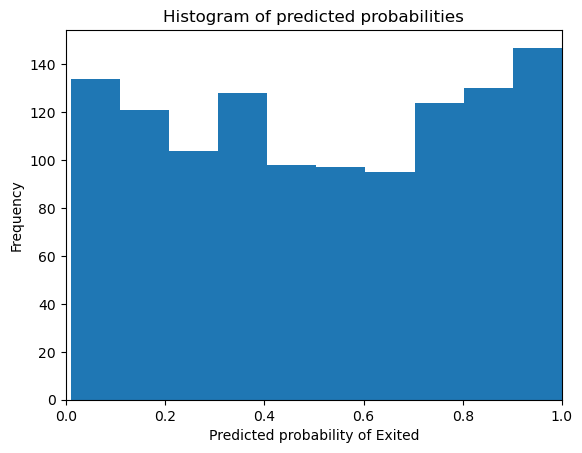

In [149]:
# Option 1
plt.hist(y1_pred_prob, bins=10) 
plt.xlim(0, 1) 
plt.title('Histogram of predicted probabilities') 
plt.xlabel('Predicted probability of Exited') 
plt.ylabel('Frequency') 
plt.show() 

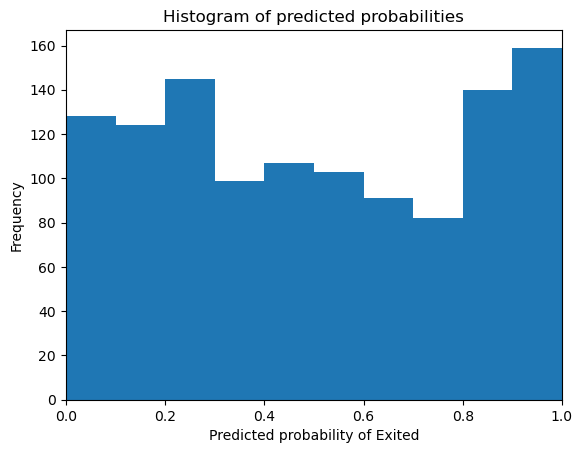

In [150]:
# Option 5
plt.hist(y5_pred_prob, bins=10) 
plt.xlim(0, 1) 
plt.title('Histogram of predicted probabilities') 
plt.xlabel('Predicted probability of Exited') 
plt.ylabel('Frequency') 
plt.show() 

# Modeling with Balance Options 1 and 5

## Split the data into train, validate, test

### Option 1

In [151]:
# Split train/test and validate data with stratification
df1X, df1X_val, df1y, df1y_val = train_test_split(df1_feature, 
                                                  df1_target,
                                                  test_size=.10, 
                                                  random_state=0,
                                                  stratify=df1_target)

In [153]:
# Split the train/test from above into train and test data with stratification
X1a_train, X1a_test, y1a_train, y1a_test = train_test_split(df1X,df1y,
                                                  test_size=.15, 
                                                  random_state=0,
                                                  stratify=df1y)

### Option 5

In [155]:
# Split train/test and validate data with stratification
df5X, df5X_val, df5y, df5y_val = train_test_split(df5_feature, 
                                                  df5_target,
                                                  test_size=.10, 
                                                  random_state=0,
                                                  stratify=df5_target)

In [156]:
# Split the train/test from above into train and test data with stratification
X5a_train, X5a_test, y5a_train, y5a_test = train_test_split(df5X,df5y,
                                                  test_size=.15, 
                                                  random_state=0,
                                                  stratify=df5y)

## Create funtions to fit and evaluation model options

In [157]:
#creating a function to handle classification algorithms

class fastML:
    
    def __init__(self, X, Y, X_test, y_test, *args, special_classifier_epochs=1,special_classifier_nature ='fixed',
          include_special_classifier = False, special_classifier_verbose= 1):

        ##training the model with train data
        acc_score = []
        for alg in args:
            cv = cross_val_score(alg, X, Y, cv = 3)
            alg.fit(X, Y.values.ravel())
            prediction = alg.predict(X_test)

            ##outputing statistics on the performance of the individual models
            ##statistics printed out are the accuracy score, confusion matrix and clasification report
            print('____________________________________________________')
            print("Training Cross Validation Scores for "+ alg.__class__.__name__+" is \n"+ str(cv))
            print('\n')
            
            print("Test ROC AUC Score for "+ alg.__class__.__name__+" is \n"+ str(roc_auc_score(y_test, prediction)))
            print('\n')

            print("Confusion Matrix for "+ alg.__class__.__name__+" is \n"+ str(confusion_matrix(y_test, prediction)))
            print('\n')

            print("Classification Report for "+ alg.__class__.__name__+" is \n"+ str(classification_report(y_test, prediction)))
            print('\n')
            print('____________________________________________________')

            ##saving the accuracy scores of the individual models as variables
            accuracy = str(accuracy_score(y_test, prediction))

            ##making a list of individual models and their accuracy scores
            acc_score.append([alg.__class__.__name__, accuracy])
    
        ##creating a dataframe of every individual model and accuracy score 
        df = pd.DataFrame(acc_score, columns=['Model', 'Accuracy'])
        ##outputing the created dataframe 
        print(df)

In [158]:
#creating a function to handle standard scaling with classification algorithms

class fastMLScaledStandard:
    
    def __init__(self, X, Y, X_test, y_test, *args, special_classifier_epochs=1,special_classifier_nature ='fixed',
          include_special_classifier = False, special_classifier_verbose= 1):

        ##training the model with train data
        acc_score = []
        for alg in args:
            cv = cross_val_score(alg, X, Y, cv = 3)
            scaler = StandardScaler()
            scaler.fit(X)
            scaler.fit(X_test)
            alg.fit(X, Y.values.ravel())
            prediction = alg.predict(X_test)

            ##outputing statistics on the performance of the individual models
            ##statistics printed out are the accuracy score, confusion matrix and clasification report
            print('____________________________________________________')
            print("Training Cross Validation Scores for "+ alg.__class__.__name__+" is \n"+ str(cv))
            print('\n')

            print("Test ROC AUC Score for "+ alg.__class__.__name__+" is \n"+ str(roc_auc_score(y_test, prediction)))
            print('\n')
            
            print("Confusion Matrix for "+ alg.__class__.__name__+" is \n"+ str(confusion_matrix(y_test, prediction)))
            print('\n')

            print("Classification Report for "+ alg.__class__.__name__+" is \n"+ str(classification_report(y_test, prediction)))
            print('\n')
            print('____________________________________________________')

            ##saving the accuracy scores of the individual models as variables
            accuracy = str(accuracy_score(y_test, prediction))

            ##making a list of individual models and their accuracy scores
            acc_score.append([alg.__class__.__name__, accuracy])
    
        ##creating a dataframe of every individual model and accuracy score 
        df = pd.DataFrame(acc_score, columns=['Model', 'Accuracy'])
        ##outputing the created dataframe 
        print(df)

In [159]:
#creating a function to handle Min Max scaled classification algorithms

class fastMLScaledMM:
    
    def __init__(self, X, Y, X_test, y_test, *args, special_classifier_epochs=1,special_classifier_nature ='fixed',
          include_special_classifier = False, special_classifier_verbose= 1):

        ##training the model with train data
        acc_score = []
        pred_prob = []
        for alg in args:
            cv = cross_val_score(alg, X, Y, cv = 3)
            scaler = MinMaxScaler()
            scaler.fit(X)
            scaler.fit(X_test)
            alg.fit(X, Y.values.ravel())
            prediction = alg.predict(X_test)
            featureImp = pd.DataFrame({'feature1': list(X.columns),
                   'importance1': alg.feature_importances_}).\
                    sort_values('importance1', ascending = False)

            ##outputing statistics on the performance of the individual models
            ##statistics printed out are the accuracy score, confusion matrix and clasification report
            print('____________________________________________________')
            print("Training Cross Validation Scores for "+ alg.__class__.__name__+" is \n"+ str(cv))
            print('\n')

            print("Test ROC AUC Score for "+ alg.__class__.__name__+" is \n"+ str(roc_auc_score(y_test, prediction)))
            print('\n')
            
            print("Confusion Matrix for "+ alg.__class__.__name__+" is \n"+ str(confusion_matrix(y_test, prediction)))
            print('\n')

            print("Classification Report for "+ alg.__class__.__name__+" is \n"+ str(classification_report(y_test, prediction)))
            print('\n')

            print("Feature Importance for "+ alg.__class__.__name__+" is \n"+ str(featureImp.head()))
            print('\n')
         
            print('____________________________________________________')

            ##saving the accuracy scores of the individual models as variables
            accuracy = str(accuracy_score(y_test, prediction))
            pred_probability = str(alg.predict_proba(X_test)[:, 1])
            ##making a list of individual models and their accuracy scores
            acc_score.append([alg.__class__.__name__, accuracy])
        
        ##creating a dataframe of every individual model and accuracy score 
        df = pd.DataFrame(acc_score, columns=['Model', 'Accuracy'])
        ##outputing the created dataframe 
        print(df)

## Fit and Evaluate Model Options

### Option 1

In [162]:
# Fit and evaluate several classification models without scaling
fastML(X1a_train, y1a_train, X1a_test, y1a_test, RandomForestClassifier(), MLPClassifier(), SVC(), AdaBoostClassifier(), GaussianNB(), DecisionTreeClassifier(), CategoricalNB(), LogisticRegressionCV(cv=5, random_state=0),include_special_classifier = False)

____________________________________________________
Training Cross Validation Scores for RandomForestClassifier is 
[0.76623377 0.78521479 0.77622378]


Test ROC AUC Score for RandomForestClassifier is 
0.7490566037735849


Confusion Matrix for RandomForestClassifier is 
[[207  58]
 [ 75 190]]


Classification Report for RandomForestClassifier is 
              precision    recall  f1-score   support

           0       0.73      0.78      0.76       265
           1       0.77      0.72      0.74       265

    accuracy                           0.75       530
   macro avg       0.75      0.75      0.75       530
weighted avg       0.75      0.75      0.75       530



____________________________________________________
____________________________________________________
Training Cross Validation Scores for MLPClassifier is 
[0.54645355 0.47552448 0.4965035 ]


Test ROC AUC Score for MLPClassifier is 
0.4641509433962264


Confusion Matrix for MLPClassifier is 
[[104 161]
 [123 142]

In [166]:
# Fit and evaluate several classification models with standard scaling
fastMLScaledStandard(X1a_train, y1a_train, X1a_test, y1a_test, RandomForestClassifier(),include_special_classifier = False)

____________________________________________________
Training Cross Validation Scores for RandomForestClassifier is 
[0.77022977 0.77222777 0.75824176]


Test ROC AUC Score for RandomForestClassifier is 
0.7566037735849057


Confusion Matrix for RandomForestClassifier is 
[[209  56]
 [ 73 192]]


Classification Report for RandomForestClassifier is 
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       265
           1       0.77      0.72      0.75       265

    accuracy                           0.76       530
   macro avg       0.76      0.76      0.76       530
weighted avg       0.76      0.76      0.76       530



____________________________________________________
                    Model            Accuracy
0  RandomForestClassifier  0.7566037735849057


In [165]:
# Fit and evaluate several classification models with Min Max scaling
fastMLScaledMM(X1a_train, y1a_train, X1a_test, y1a_test, RandomForestClassifier(),include_special_classifier = False)

____________________________________________________
Training Cross Validation Scores for RandomForestClassifier is 
[0.76923077 0.78721279 0.76223776]


Test ROC AUC Score for RandomForestClassifier is 
0.760377358490566


Confusion Matrix for RandomForestClassifier is 
[[209  56]
 [ 71 194]]


Classification Report for RandomForestClassifier is 
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       265
           1       0.78      0.73      0.75       265

    accuracy                           0.76       530
   macro avg       0.76      0.76      0.76       530
weighted avg       0.76      0.76      0.76       530



Feature Importance for RandomForestClassifier is 
           feature1  importance1
2           Age_log     0.232459
3           Balance     0.129312
6   EstimatedSalary     0.120510
0       CreditScore     0.120173
22  NumOfProducts_2     0.079591


____________________________________________________
                  

### Option 5

In [167]:
# Fit and evaluate several classification models without scaling
fastML(X5a_train, y5a_train, X5a_test, y5a_test, RandomForestClassifier(), MLPClassifier(), SVC(), AdaBoostClassifier(), GaussianNB(), DecisionTreeClassifier(), CategoricalNB(), LogisticRegressionCV(cv=5, random_state=0),include_special_classifier = False)

____________________________________________________
Training Cross Validation Scores for RandomForestClassifier is 
[0.74025974 0.76423576 0.76523477]


Test ROC AUC Score for RandomForestClassifier is 
0.8037735849056604


Confusion Matrix for RandomForestClassifier is 
[[205  60]
 [ 44 221]]


Classification Report for RandomForestClassifier is 
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       265
           1       0.79      0.83      0.81       265

    accuracy                           0.80       530
   macro avg       0.80      0.80      0.80       530
weighted avg       0.80      0.80      0.80       530



____________________________________________________
____________________________________________________
Training Cross Validation Scores for MLPClassifier is 
[0.48351648 0.57942058 0.55844156]


Test ROC AUC Score for MLPClassifier is 
0.4981132075471698


Confusion Matrix for MLPClassifier is 
[[254  11]
 [255  10]

In [168]:
# Fit and evaluate several classification models with standard scaling
fastMLScaledStandard(X5a_train, y5a_train, X5a_test, y5a_test, RandomForestClassifier(),include_special_classifier = False)

____________________________________________________
Training Cross Validation Scores for RandomForestClassifier is 
[0.74325674 0.76023976 0.76823177]


Test ROC AUC Score for RandomForestClassifier is 
0.809433962264151


Confusion Matrix for RandomForestClassifier is 
[[210  55]
 [ 46 219]]


Classification Report for RandomForestClassifier is 
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       265
           1       0.80      0.83      0.81       265

    accuracy                           0.81       530
   macro avg       0.81      0.81      0.81       530
weighted avg       0.81      0.81      0.81       530



____________________________________________________
                    Model           Accuracy
0  RandomForestClassifier  0.809433962264151


In [169]:
# Fit and evaluate several classification models with Min Max scaling
fastMLScaledMM(X5a_train, y5a_train, X5a_test, y5a_test, RandomForestClassifier(),include_special_classifier = False)

____________________________________________________
Training Cross Validation Scores for RandomForestClassifier is 
[0.76523477 0.77522478 0.77422577]


Test ROC AUC Score for RandomForestClassifier is 
0.8132075471698114


Confusion Matrix for RandomForestClassifier is 
[[213  52]
 [ 47 218]]


Classification Report for RandomForestClassifier is 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       265
           1       0.81      0.82      0.81       265

    accuracy                           0.81       530
   macro avg       0.81      0.81      0.81       530
weighted avg       0.81      0.81      0.81       530



Feature Importance for RandomForestClassifier is 
           feature1  importance1
2           Age_log     0.222127
3          Zero_Bal     0.131960
6   EstimatedSalary     0.121731
0       CreditScore     0.120193
22  NumOfProducts_2     0.085179


____________________________________________________
                 

# Validate the model

## Fit and Evaluate the final selected model

In [210]:
scaler = StandardScaler()
scaler.fit(X5a_train)
scaler.fit(X5a_test)
model = RandomForestClassifier()
rf5s=model.fit(X5a_train, y5a_train)
prediction5 = rf5s.predict(X5a_test)

print('ROC AUC\n',roc_auc_score(y5a_test, prediction5),'\n')
print('Confusion Matrix\n',confusion_matrix(y5a_test, prediction5),'\n')
print('Classification Report\n',classification_report(y5a_test, prediction5))

ROC AUC
 0.8207547169811321 

Confusion Matrix
 [[216  49]
 [ 46 219]] 

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       265
           1       0.82      0.83      0.82       265

    accuracy                           0.82       530
   macro avg       0.82      0.82      0.82       530
weighted avg       0.82      0.82      0.82       530



## Final Validation

In [211]:
final_predict = rf5s.predict(df5X_val)
print('ROC AUC\n',roc_auc_score(df5y_val, final_predict),'\n')
print('Confusion Matrix\n',confusion_matrix(df5y_val, final_predict),'\n')
print('Classification Report\n',classification_report(df5y_val, final_predict))

ROC AUC
 0.7913343002175489 

Confusion Matrix
 [[157  40]
 [ 42 154]] 

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       197
           1       0.79      0.79      0.79       196

    accuracy                           0.79       393
   macro avg       0.79      0.79      0.79       393
weighted avg       0.79      0.79      0.79       393



## Final Model Feature Importance

In [203]:
fi_final = pd.DataFrame({'feature_final': list(X5a_train.columns),
                   'importance_final': rf5s.feature_importances_}).\
                    sort_values('importance_final', ascending = False)
fi_final.head()

,feature_final,importance_final
2,Age_log,0.225313
3,Zero_Bal,0.131050
0,CreditScore,0.121039
6,EstimatedSalary,0.120637
22,NumOfProducts_2,0.090425
